# Feature Selection
### I am aiming to only linclude features that 1) are predictive of the target variable and 2) capture unique information not found in other features.
### After feature engineering, I imputed respective mean to each feature that has NaNs, and then I scaled the features to z-score to normalize, because the unit of each feature is different. After scaling features, I will conduct feature selection by RFECV and then RFE, and then I will inverse the scaling.

### Pulling my data with engineered & imputed& scaled features

### Start by retrieving my data with scaled features in the previous step.

In [1]:
import pandas as pd

scaled_df = pd.read_csv('https://raw.githubusercontent.com/mhan1/Data-Science/master/Machine%20Learning_Linear%20Regression%20project_Minyeong%20Han_Data%20Science/scaled_imputed_engineered_features.csv')
scaled_df.head(3)

,Unnamed: 0,symboling,num_of_doors,wheel-base,length,width,height,curb_weight,num_of_cylinders,engine_size,...,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_other,fuel_system_1bbl,fuel_system_2bbl,fuel_system_idi,fuel_system_mpfi,fuel_system_other,normalized_losses
0,0,1.743470,-1.13733,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.074449,...,-1.611363,-0.280976,-0.260208,-0.158114,-0.23812,-0.689072,-0.328798,1.08667,-0.270737,0.0
1,1,1.743470,-1.13733,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.074449,...,-1.611363,-0.280976,-0.260208,-0.158114,-0.23812,-0.689072,-0.328798,1.08667,-0.270737,0.0
2,2,0.133509,-1.13733,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,1.502032,0.604046,...,-1.611363,-0.280976,3.843076,-0.158114,-0.23812,-0.689072,-0.328798,1.08667,-0.270737,0.0


In [2]:
scaled_df.columns

Index(['Unnamed: 0', 'symboling', 'num_of_doors', 'wheel-base', 'length',
       'width', 'height', 'curb_weight', 'num_of_cylinders', 'engine_size',
       'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm',
       'city_mpg', 'highway_mpg', 'price', 'engine_location_is_front',
       'fuel_type_is_gas', 'aspiration_is_std', 'make_honda', 'make_mazda',
       'make_mitsubishi', 'make_nissan', 'make_other', 'make_peugot',
       'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo',
       'body_style_hatchback', 'body_style_other', 'body_style_sedan',
       'body_style_wagon', 'drive_wheels_fwd', 'drive_wheels_other',
       'drive_wheels_rwd', 'engine_type_dohc', 'engine_type_l',
       'engine_type_ohc', 'engine_type_ohcf', 'engine_type_ohcv',
       'engine_type_other', 'fuel_system_1bbl', 'fuel_system_2bbl',
       'fuel_system_idi', 'fuel_system_mpfi', 'fuel_system_other',
       'normalized_losses'],
      dtype='object')

In [3]:
#removing unnecessary column 
scaled_df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
scaled_df.head()

,symboling,num_of_doors,wheel-base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,...,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_other,fuel_system_1bbl,fuel_system_2bbl,fuel_system_idi,fuel_system_mpfi,fuel_system_other,normalized_losses
0,1.743470,-1.137330,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.074449,0.519089,...,-1.611363,-0.280976,-0.260208,-0.158114,-0.23812,-0.689072,-0.328798,1.08667,-0.270737,0.000000
1,1.743470,-1.137330,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.074449,0.519089,...,-1.611363,-0.280976,-0.260208,-0.158114,-0.23812,-0.689072,-0.328798,1.08667,-0.270737,0.000000
2,0.133509,-1.137330,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,1.502032,0.604046,-2.404862,...,-1.611363,-0.280976,3.843076,-0.158114,-0.23812,-0.689072,-0.328798,1.08667,-0.270737,0.000000
3,0.938490,0.887915,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.352887,-0.431076,-0.517248,...,0.620593,-0.280976,-0.260208,-0.158114,-0.23812,-0.689072,-0.328798,1.08667,-0.270737,1.328961
4,0.938490,0.887915,0.107110,0.207256,0.230001,0.235942,0.516807,0.574572,0.218885,-0.517248,...,0.620593,-0.280976,-0.260208,-0.158114,-0.23812,-0.689072,-0.328798,1.08667,-0.270737,1.328961


In [5]:
scaled_X = scaled_df.iloc[:, :-1]
scaled_y = scaled_df.iloc[:, -1]

In [6]:
scaled_X.head(2)

,symboling,num_of_doors,wheel-base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,...,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_other,fuel_system_1bbl,fuel_system_2bbl,fuel_system_idi,fuel_system_mpfi,fuel_system_other
0,1.74347,-1.13733,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.074449,0.519089,...,-0.249351,-1.611363,-0.280976,-0.260208,-0.158114,-0.23812,-0.689072,-0.328798,1.08667,-0.270737
1,1.74347,-1.13733,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.074449,0.519089,...,-0.249351,-1.611363,-0.280976,-0.260208,-0.158114,-0.23812,-0.689072,-0.328798,1.08667,-0.270737


In [7]:
scaled_y.head()

0    0.000000
1    0.000000
2    0.000000
3    1.328961
4    1.328961
Name: normalized_losses, dtype: float64

In [8]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(scaled_df.shape)
print(scaled_X.shape)
print(scaled_y.shape)

(205, 49)
(205, 48)
(205,)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([ 0.3596105 , -0.08137725,  0.03885427,  0.01641536,  0.05020372,
       -0.13361818, -0.15950939,  0.16224751,  0.22163727, -0.09944432,
        0.1059568 , -0.24100325, -0.47102461,  0.36071855, -0.74039158,
        0.61795151,  0.04161393,  0.09986645, -0.10736946, -0.11604878,
       -0.22442674,  0.09229369,  0.11694391,  0.17167102,  0.01789324,
        0.09099893,  0.02356278, -0.02405876, -0.13176928, -0.18893177,
        0.01811236, -0.19798786,  0.09925326, -0.02497849, -0.32276677,
        0.00576389,  0.32677587, -0.02840887,  0.08735026,  0.05115121,
       -0.02480949, -0.04294185, -0.12854112,  0.01961328, -0.04790607,
        0.10736946,  0.07235342, -0.19801033])

In [11]:
model.score(X_test, y_test)

0.3230607822832168

In [12]:
model.score(X_val, y_val)

0.29204245575232335

### I have 48 features and 205 observation after feature engineering is done.<br>Now, I will perform RFECV (Recursive Feature Elimination with Cross Validation) to quickly create multiple models with recursive feature elimination, and discover the number of features my model can be limited to before a significant drop in r-square score.<br>Once I discover the number of features to be selected, I will use RFE (Recursive Feature Elimination) to discover which of those features I should select by using "rfe.support_" to identify those features.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV, RFE


estimator = LinearRegression(n_jobs=-1)
initial_rfe = RFECV(estimator, step=1, cv=5)
X_train_rfe = initial_rfe.fit_transform(X_train, y = y_train)

In [14]:
rfecv_scores = initial_rfe.grid_scores_
rfecv_scores

array([0.08512839, 0.09249624, 0.10645314, 0.07356229, 0.1926952 ,
       0.18694717, 0.13774435, 0.17441185, 0.19340447, 0.17866234,
       0.20346188, 0.19800855, 0.20929082, 0.17529981, 0.14913598,
       0.14719711, 0.11575623, 0.08719766, 0.10398373, 0.08690924,
       0.08848782, 0.07878491, 0.11393618, 0.11701154, 0.11706974,
       0.13302106, 0.11902161, 0.12459743, 0.1273103 , 0.11446128,
       0.11569711, 0.11825553, 0.12061002, 0.12542341, 0.14173413,
       0.14783275, 0.14241975, 0.14461603, 0.15256784, 0.15226314,
       0.1513277 , 0.15743394, 0.15648972, 0.16025189, 0.16025189,
       0.16079991, 0.16076497, 0.16076497])

In [15]:
import numpy as np

x_values = np.array(list(range(1, 49, 1)))
x_values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [16]:
from graph import trace_values, plot

x_values = np.array(list(range(1, 49, 1)))
y_values = rfecv_scores

trace_rfecv = trace_values(x_values, y_values)
plot([trace_rfecv])

### Based on above, 13 features are my number, as I still have a score of 0.2093. I will perform RFE below, and then find out which 13 features were selected.

### Because I have 48 features with the dataset, in the code below I perform RFE with 48 features and then removing one by one. And at each step, I store the accuracy score I achieved with this number of feature.

In [17]:
import numpy as np

selectors = []

for idx in list(range(1, 49, 1))[::-1]:
    # 1. create an estimator
    estimator = LinearRegression(n_jobs=-1)
    
    # 2. perform rfe with the idx number of features
    rfe = RFE(estimator, idx, step=1)
    
    # 3. reduce the dataset to the number of features
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    # used rfe.transform(X_test) to also reduce the test set down to the same number of features.
    
    # 4. compute the accuracy score and append to the list
    estimator.fit(X_train_rfe, y_train)
    score = estimator.score(X_test_rfe,y_test)
    selectors.append(np.array([rfe, score, idx]))

In [18]:
selectors

[array([RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False),
   n_features_to_select=48, step=1, verbose=0),
        0.3230607822832168, 48], dtype=object),
 array([RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False),
   n_features_to_select=47, step=1, verbose=0),
        0.3230607822832171, 47], dtype=object),
 array([RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False),
   n_features_to_select=46, step=1, verbose=0),
        0.3226328086701784, 46], dtype=object),
 array([RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False),
   n_features_to_select=45, step=1, verbose=0),
        0.3226328086701798, 45], dtype=object),
 array([RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False),
   n_features_to_select=44, step=1, verbose=0),
        0.32242199352837336, 44], dtype=object),
 array([RFE(es

In [19]:
x_points = np.array(selectors)[:, -1]
y_points = np.array(selectors)[:, 1]
x_points

array([48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32,
       31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1], dtype=object)

In [20]:
from graph import trace_values, plot
trace_rfe = trace_values(x_points, y_points)
plot([trace_rfe])

### By looking at the graph by RFE, I found there was discrepancy between RFECV and RFE, hence, I chose 23 features instead of 13, as the score with 13 features is negative based on RFE graph above. With 23 features, RFECV shows a score of 0.1139 and RFE shows a score of 0.1056.

In [21]:
estimator = LinearRegression(n_jobs=-1)
# perform rfe with the 13 number of features
rfe = RFE(estimator, 23)

# reduce the dataset to the number of features
X_train_rfe = rfe.fit_transform(X_train, y_train)  

# use rfe.transform(X_test) to also reduce the test set down to the same number of features.
X_test_rfe = rfe.transform(X_test)

# compute the accuracy score
estimator.fit(X_train_rfe, y_train)
estimator.score(X_test_rfe, y_test)

0.10557953582860191

In [22]:
X_val_rfe = rfe.transform(X_val)

In [23]:
estimator.score(rfe.transform(X_val), y_val)

0.27600620273570986

### Now I can use the support_ method.

In [24]:
[rfe.support_]

[array([ True, False, False, False, False,  True,  True, False,  True,
         True, False,  True,  True,  True,  True,  True, False,  True,
         True, False,  True, False, False,  True, False,  True, False,
        False,  True,  True, False,  True, False, False,  True, False,
         True, False, False,  True, False, False, False, False, False,
         True, False,  True])]

In [25]:
len(scaled_X.columns[rfe.support_])

23

In [26]:
scaled_X.columns[rfe.support_]

Index(['symboling', 'height', 'curb_weight', 'engine_size', 'bore',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'engine_location_is_front', 'fuel_type_is_gas',
       'make_honda', 'make_nissan', 'make_peugot', 'make_volkswagen',
       'make_volvo', 'body_style_other', 'drive_wheels_fwd',
       'drive_wheels_rwd', 'engine_type_ohc', 'fuel_system_idi',
       'fuel_system_other'],
      dtype='object')

In [27]:
import numpy as np

selected_feat_names = np.array(scaled_X.columns[rfe.support_])
selected_feat_names

array(['symboling', 'height', 'curb_weight', 'engine_size', 'bore',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'engine_location_is_front', 'fuel_type_is_gas',
       'make_honda', 'make_nissan', 'make_peugot', 'make_volkswagen',
       'make_volvo', 'body_style_other', 'drive_wheels_fwd',
       'drive_wheels_rwd', 'engine_type_ohc', 'fuel_system_idi',
       'fuel_system_other'], dtype=object)

## Correlation analysis

### To see which features may still be redundant, I will explore correlation between the features

In [28]:
X =scaled_df.iloc[:, :-1]
X.head(2)

,symboling,num_of_doors,wheel-base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,...,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_other,fuel_system_1bbl,fuel_system_2bbl,fuel_system_idi,fuel_system_mpfi,fuel_system_other
0,1.74347,-1.13733,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.074449,0.519089,...,-0.249351,-1.611363,-0.280976,-0.260208,-0.158114,-0.23812,-0.689072,-0.328798,1.08667,-0.270737
1,1.74347,-1.13733,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.074449,0.519089,...,-0.249351,-1.611363,-0.280976,-0.260208,-0.158114,-0.23812,-0.689072,-0.328798,1.08667,-0.270737


In [29]:
reduced_X = X[scaled_X.columns[rfe.support_]]
len(reduced_X.columns)

23

In [30]:
reduced_X.head(2)

,symboling,height,curb_weight,engine_size,bore,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,...,make_nissan,make_peugot,make_volkswagen,make_volvo,body_style_other,drive_wheels_fwd,drive_wheels_rwd,engine_type_ohc,fuel_system_idi,fuel_system_other
0,1.74347,-2.020417,-0.014566,0.074449,0.519089,-0.288349,0.171065,-0.263484,-0.646553,-0.546059,...,-0.310253,-0.23812,-0.249351,-0.23812,3.693624,-1.188177,1.302831,-1.611363,-0.328798,-0.270737
1,1.74347,-2.020417,-0.014566,0.074449,0.519089,-0.288349,0.171065,-0.263484,-0.646553,-0.546059,...,-0.310253,-0.23812,-0.249351,-0.23812,3.693624,-1.188177,1.302831,-1.611363,-0.328798,-0.270737


In [31]:
reduced_X.shape

(205, 23)

### I will visualize the associations of each feature with the others by creating a scatter matrix.

In [32]:
import seaborn as sns

#Draw scatterplots for joint relationships and histograms for univariate distributions
sns.pairplot(reduced_X)

In [33]:
reduced_X.corr(method = 'pearson')

,symboling,height,curb_weight,engine_size,bore,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,...,make_nissan,make_peugot,make_volkswagen,make_volvo,body_style_other,drive_wheels_fwd,drive_wheels_rwd,engine_type_ohc,fuel_system_idi,fuel_system_other
symboling,1.000000,-0.541038,-0.227691,-0.105790,-0.130083,-0.178515,0.071389,0.273679,-0.035823,0.034606,...,0.041422,-0.159891,0.167106,-0.403849,0.316352,0.102839,-0.076381,-0.082855,-0.194311,0.300785
height,-0.541038,1.000000,0.295572,0.067149,0.171101,0.261214,-0.110137,-0.320602,-0.048640,-0.107358,...,-0.011652,0.337701,0.149194,0.245342,-0.164607,-0.100273,0.039814,0.036260,0.284631,-0.370878
curb_weight,-0.227691,0.295572,1.000000,0.850594,0.648485,0.151362,0.750968,-0.266283,-0.757414,-0.797465,...,-0.092690,0.305064,-0.101966,0.221127,0.130946,-0.666039,0.669987,-0.413293,0.217275,-0.005247
engine_size,-0.105790,0.067149,0.850594,1.000000,0.583798,0.028971,0.810713,-0.244599,-0.653658,-0.677470,...,0.007331,0.051079,-0.117994,0.088077,0.268281,-0.518391,0.565509,-0.363334,0.069594,-0.065966
bore,-0.130083,0.171101,0.648485,0.583798,1.000000,0.005201,0.575737,-0.254761,-0.584508,-0.586992,...,-0.086475,0.222955,-0.184351,0.293462,0.229290,-0.583065,0.574082,-0.410354,0.054457,0.023100
compression_ratio,-0.178515,0.261214,0.151362,0.028971,0.005201,1.000000,-0.205740,-0.435936,0.324701,0.265201,...,-0.027256,0.231817,0.219153,0.005092,-0.012667,-0.062683,0.105185,0.027545,0.984356,-0.155667
horsepower,0.071389,-0.110137,0.750968,0.810713,0.575737,-0.205740,1.000000,0.130971,-0.803162,-0.770903,...,-0.013384,-0.026806,-0.146570,0.143417,0.229775,-0.541813,0.573220,-0.425697,-0.165190,0.103216
peak_rpm,0.273679,-0.320602,-0.266283,-0.244599,-0.254761,-0.435936,0.130971,1.000000,-0.113723,-0.054257,...,0.034173,-0.228798,0.015091,0.082844,-0.022564,0.124990,-0.086560,0.028512,-0.477060,0.152200
city_mpg,-0.035823,-0.048640,-0.757414,-0.653658,-0.584508,0.324701,-0.803162,-0.113723,1.000000,0.971337,...,0.084644,-0.100885,0.128525,-0.147323,-0.169119,0.563879,-0.545789,0.391236,0.255963,-0.195788
highway_mpg,0.034606,-0.107358,-0.797465,-0.677470,-0.586992,0.265201,-0.770903,-0.054257,0.971337,1.000000,...,0.099053,-0.142632,0.151196,-0.170992,-0.159098,0.600828,-0.566149,0.426049,0.191392,-0.175989


In [34]:
reduced_X.columns

Index(['symboling', 'height', 'curb_weight', 'engine_size', 'bore',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'engine_location_is_front', 'fuel_type_is_gas',
       'make_honda', 'make_nissan', 'make_peugot', 'make_volkswagen',
       'make_volvo', 'body_style_other', 'drive_wheels_fwd',
       'drive_wheels_rwd', 'engine_type_ohc', 'fuel_system_idi',
       'fuel_system_other'],
      dtype='object')

### the pearson correlation (represented by r) captures only the linear relationship between the two variables, and a non-linear relationship is not captured when there is.

In [35]:
from graph import trace_values, plot
trace = trace_values(reduced_X.city_mpg, reduced_X.highway_mpg)
plot([trace], layout = {'xaxis': {'title': 'city_mpg'}, 'yaxis': {'title': 'highway_mpg'}})

### There appears to be a relationship between these two variables. 

In [36]:
from scipy.stats import pearsonr

pearsonr(reduced_X.city_mpg, reduced_X.highway_mpg)

(0.9713370423425047, 1.2487392495847314e-128)

### There is a strong correlation between city_mpg and highway_mpg variables as shown above.

### I will also use spearmanr, as below.

In [37]:
from scipy.stats import spearmanr

spearmanr(reduced_X.city_mpg, reduced_X.highway_mpg)

SpearmanrResult(correlation=0.9677382073374836, pvalue=1.703416922360581e-123)

 ### By using spearman correlation, I detected similar relationship with pearson correlation. The spearman correlation detects both linear and non-linear relationships, and a non-linear relationship is primarily what we see. 

In [38]:
from graph import trace_values, plot
trace = trace_values(reduced_X.city_mpg, reduced_X.highway_mpg)
plot([trace], layout = {'xaxis': {'title': 'city_mpg'}, 'yaxis': {'title': 'highway_mpg'}})

### I will plot the rank of the two variables as below.

In [39]:
from graph import trace_values, plot
trace_rank = trace_values(reduced_X.city_mpg.rank(), reduced_X.highway_mpg.rank())
plot([trace_rank], layout = {'xaxis': {'title': 'city_mpg_rank'}, 'yaxis': {'title': 'highway_mpg_rank'}})

### By calculating the rank, I transformed the relationship to be more linear.

In [40]:
from scipy.stats import pearsonr

pearsonr(reduced_X.city_mpg.rank(), reduced_X.highway_mpg.rank())

(0.9677382073374837, 1.7034169223599676e-123)

In [41]:
from scipy.stats import spearmanr

spearmanr(reduced_X.city_mpg, reduced_X.highway_mpg)

SpearmanrResult(correlation=0.9677382073374836, pvalue=1.703416922360581e-123)

### Now, as shown above, the correlation is the same between the pearson correlation of the rank and the spearman correlation. The spearman correlation between all the variables is as below.

In [42]:
reduced_X.corr(method = 'spearman')

,symboling,height,curb_weight,engine_size,bore,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,...,make_nissan,make_peugot,make_volkswagen,make_volvo,body_style_other,drive_wheels_fwd,drive_wheels_rwd,engine_type_ohc,fuel_system_idi,fuel_system_other
symboling,1.000000,-0.523124,-0.256490,-0.176542,-0.170357,0.023008,-0.008047,0.282344,-0.018317,0.053316,...,0.054840,-0.182659,0.167546,-0.381545,0.301067,0.132227,-0.101594,-0.035969,-0.209655,0.276961
height,-0.523124,1.000000,0.345852,0.199811,0.216581,0.000231,0.007691,-0.296588,-0.068625,-0.132512,...,0.004081,0.348495,0.184479,0.271255,-0.160731,-0.114947,0.064045,0.015005,0.298162,-0.372477
curb_weight,-0.256490,0.345852,1.000000,0.877739,0.701718,-0.219100,0.807934,-0.236106,-0.812947,-0.834385,...,-0.105002,0.314411,-0.095510,0.246188,0.136271,-0.671373,0.662611,-0.401454,0.195995,0.027941
engine_size,-0.176542,0.199811,0.877739,1.000000,0.702023,-0.234636,0.820572,-0.272776,-0.730056,-0.721342,...,-0.017059,0.133310,-0.112321,0.192274,0.247997,-0.534545,0.582227,-0.269485,0.132254,-0.024047
bore,-0.170357,0.216581,0.701718,0.702023,1.000000,-0.160990,0.641033,-0.298539,-0.608069,-0.614174,...,-0.100960,0.231239,-0.180106,0.281811,0.234565,-0.596982,0.584812,-0.435996,0.043695,0.015550
compression_ratio,0.023008,0.000231,-0.219100,-0.234636,-0.160990,1.000000,-0.355908,-0.022037,0.478857,0.445102,...,0.071292,-0.005158,0.091075,0.085484,0.067149,0.015337,0.059565,0.020385,0.517682,-0.262672
horsepower,-0.008047,0.007691,0.807934,0.820572,0.641033,-0.355908,1.000000,0.111905,-0.912071,-0.883815,...,-0.054361,0.022697,-0.156197,0.211043,0.231211,-0.586974,0.617242,-0.375420,-0.162639,0.176433
peak_rpm,0.282344,-0.296588,-0.236106,-0.272776,-0.298539,-0.022037,0.111905,1.000000,-0.131245,-0.056912,...,0.034491,-0.191707,0.041405,0.089770,-0.048743,0.169472,-0.125216,0.076580,-0.454971,0.155780
city_mpg,-0.018317,-0.068625,-0.812947,-0.730056,-0.608069,0.478857,-0.912071,-0.131245,1.000000,0.967738,...,0.096326,-0.092890,0.133219,-0.164852,-0.177608,0.593990,-0.576918,0.419181,0.234219,-0.218115
highway_mpg,0.053316,-0.132512,-0.834385,-0.721342,-0.614174,0.445102,-0.883815,-0.056912,0.967738,1.000000,...,0.091060,-0.155784,0.146899,-0.198671,-0.148173,0.637028,-0.599060,0.459606,0.157700,-0.206297


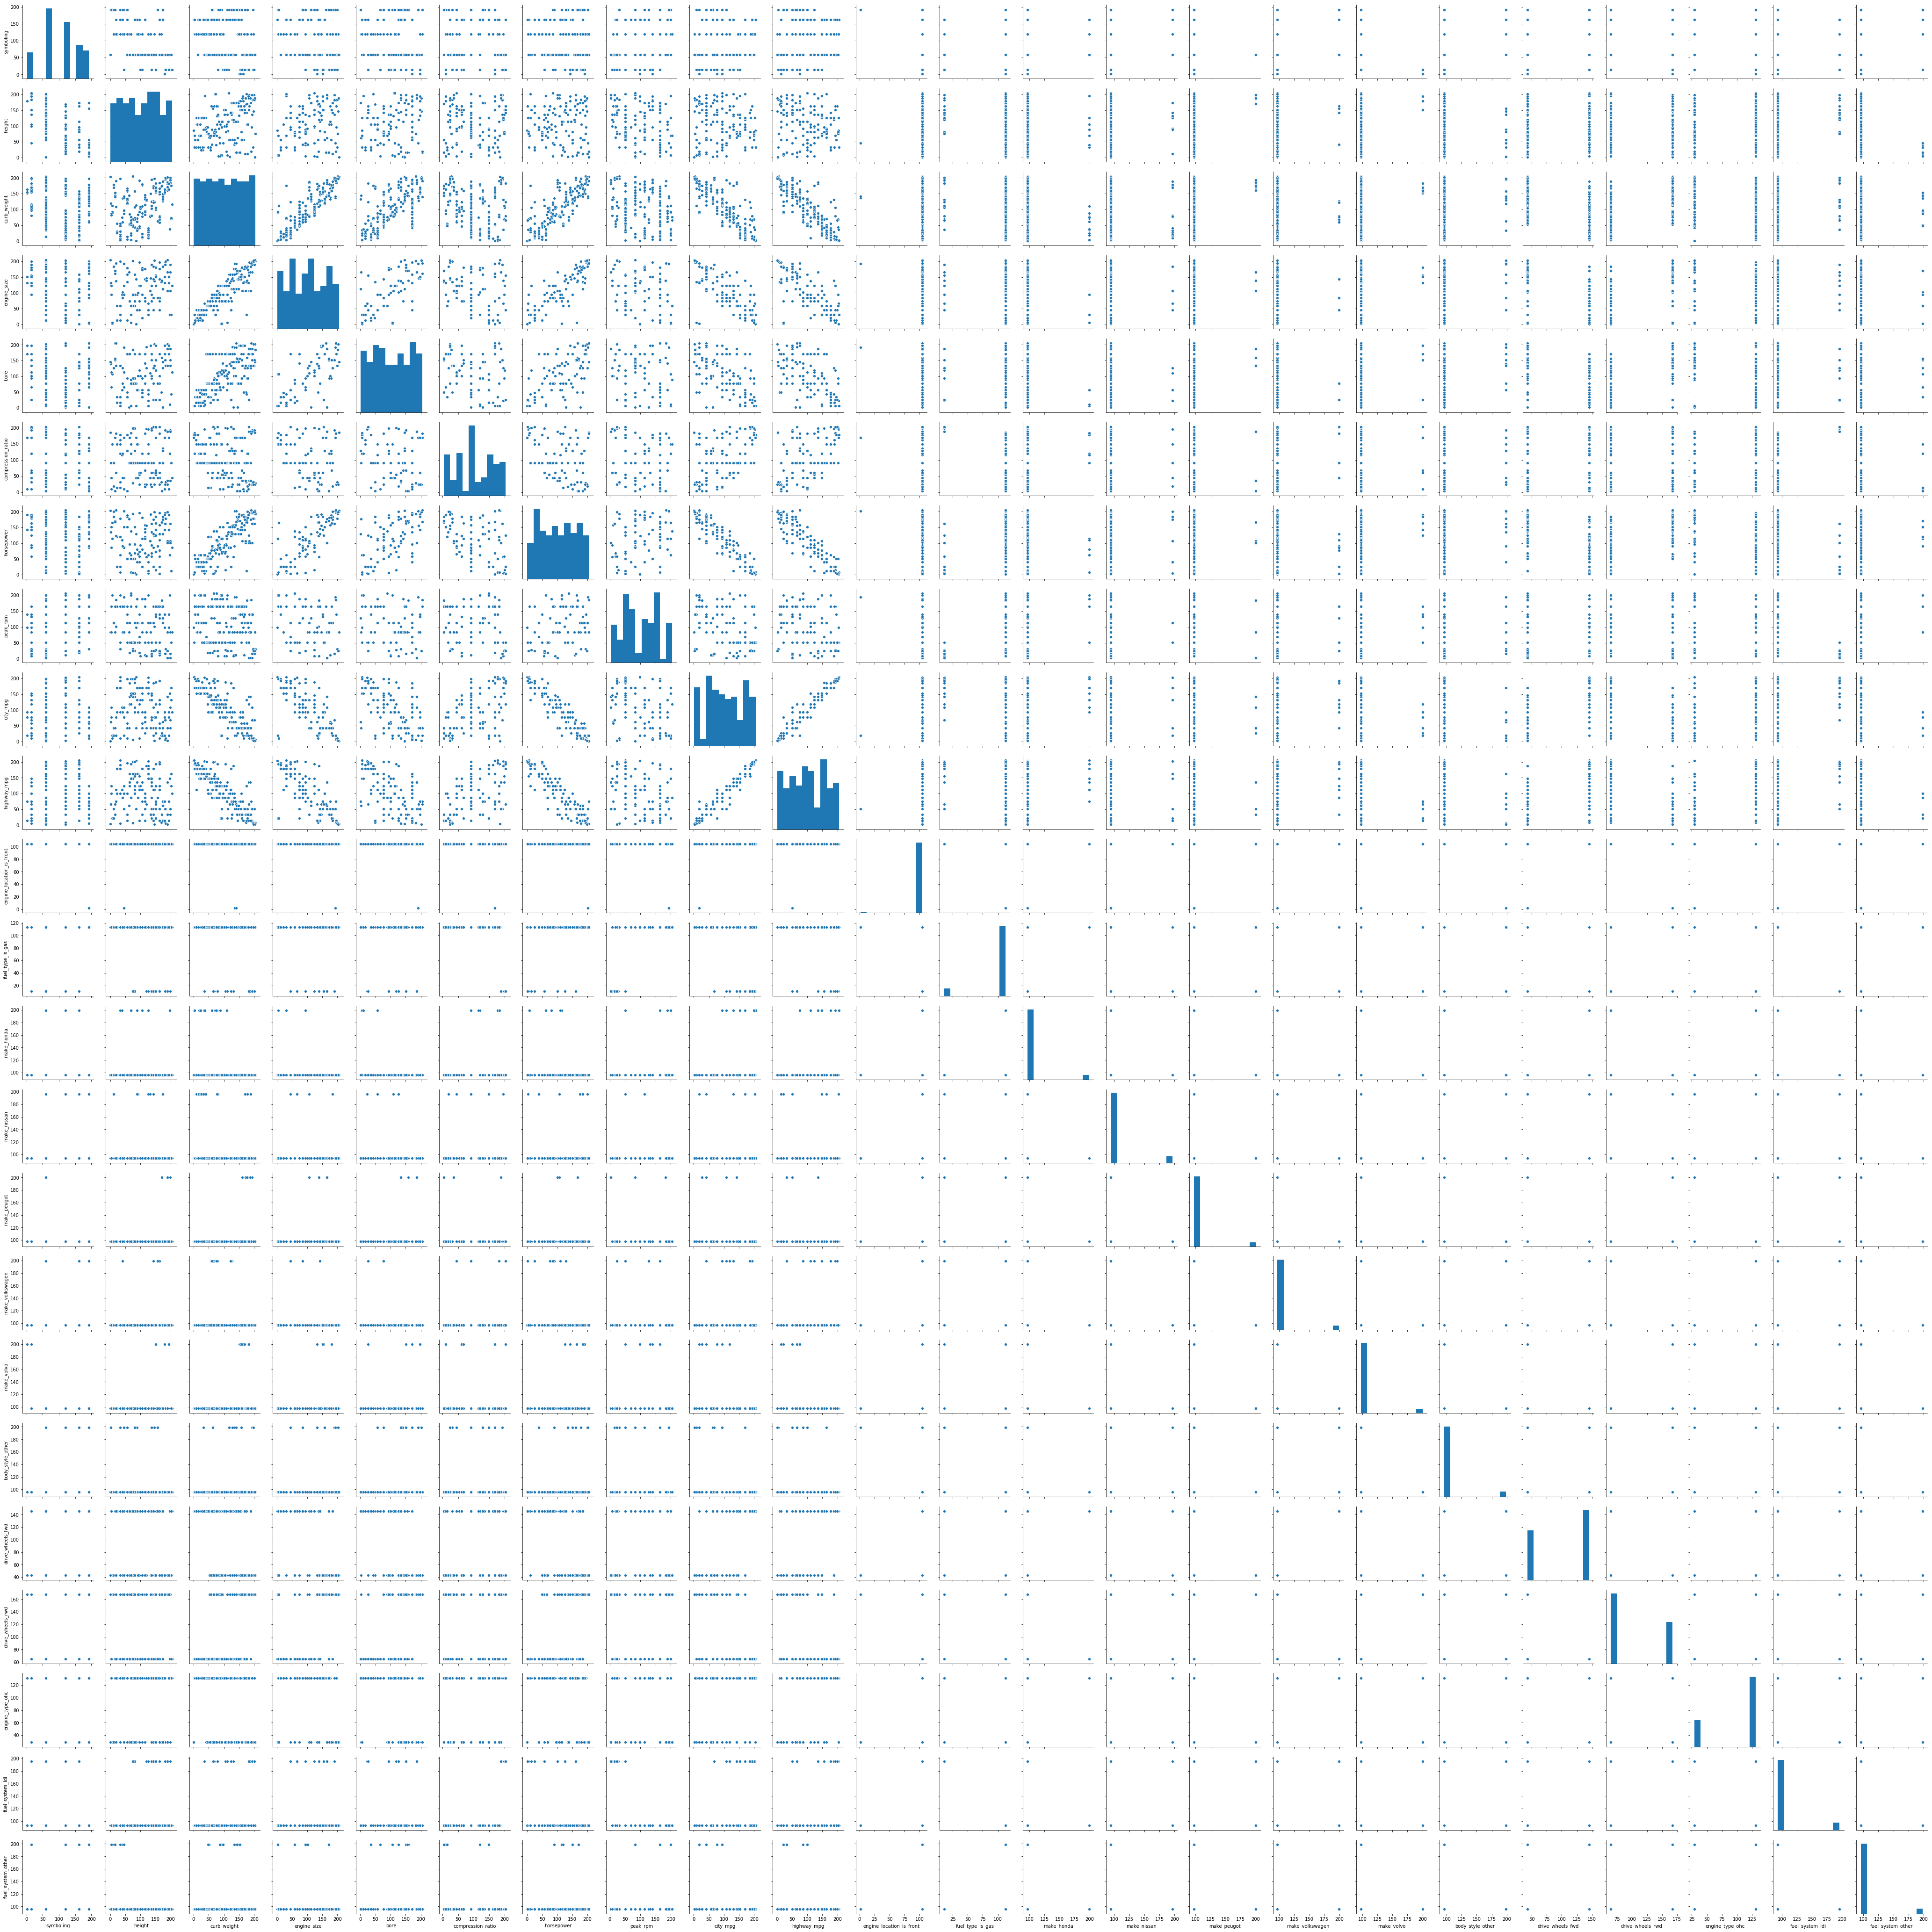

In [43]:
import seaborn as sns

#Draw scatterplots for joint relationships and histograms for univariate distributions
sns.pairplot(reduced_X.rank())

## Dendrogram

In [44]:
reduced_X.corr(method='spearman')

,symboling,height,curb_weight,engine_size,bore,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,...,make_nissan,make_peugot,make_volkswagen,make_volvo,body_style_other,drive_wheels_fwd,drive_wheels_rwd,engine_type_ohc,fuel_system_idi,fuel_system_other
symboling,1.000000,-0.523124,-0.256490,-0.176542,-0.170357,0.023008,-0.008047,0.282344,-0.018317,0.053316,...,0.054840,-0.182659,0.167546,-0.381545,0.301067,0.132227,-0.101594,-0.035969,-0.209655,0.276961
height,-0.523124,1.000000,0.345852,0.199811,0.216581,0.000231,0.007691,-0.296588,-0.068625,-0.132512,...,0.004081,0.348495,0.184479,0.271255,-0.160731,-0.114947,0.064045,0.015005,0.298162,-0.372477
curb_weight,-0.256490,0.345852,1.000000,0.877739,0.701718,-0.219100,0.807934,-0.236106,-0.812947,-0.834385,...,-0.105002,0.314411,-0.095510,0.246188,0.136271,-0.671373,0.662611,-0.401454,0.195995,0.027941
engine_size,-0.176542,0.199811,0.877739,1.000000,0.702023,-0.234636,0.820572,-0.272776,-0.730056,-0.721342,...,-0.017059,0.133310,-0.112321,0.192274,0.247997,-0.534545,0.582227,-0.269485,0.132254,-0.024047
bore,-0.170357,0.216581,0.701718,0.702023,1.000000,-0.160990,0.641033,-0.298539,-0.608069,-0.614174,...,-0.100960,0.231239,-0.180106,0.281811,0.234565,-0.596982,0.584812,-0.435996,0.043695,0.015550
compression_ratio,0.023008,0.000231,-0.219100,-0.234636,-0.160990,1.000000,-0.355908,-0.022037,0.478857,0.445102,...,0.071292,-0.005158,0.091075,0.085484,0.067149,0.015337,0.059565,0.020385,0.517682,-0.262672
horsepower,-0.008047,0.007691,0.807934,0.820572,0.641033,-0.355908,1.000000,0.111905,-0.912071,-0.883815,...,-0.054361,0.022697,-0.156197,0.211043,0.231211,-0.586974,0.617242,-0.375420,-0.162639,0.176433
peak_rpm,0.282344,-0.296588,-0.236106,-0.272776,-0.298539,-0.022037,0.111905,1.000000,-0.131245,-0.056912,...,0.034491,-0.191707,0.041405,0.089770,-0.048743,0.169472,-0.125216,0.076580,-0.454971,0.155780
city_mpg,-0.018317,-0.068625,-0.812947,-0.730056,-0.608069,0.478857,-0.912071,-0.131245,1.000000,0.967738,...,0.096326,-0.092890,0.133219,-0.164852,-0.177608,0.593990,-0.576918,0.419181,0.234219,-0.218115
highway_mpg,0.053316,-0.132512,-0.834385,-0.721342,-0.614174,0.445102,-0.883815,-0.056912,0.967738,1.000000,...,0.091060,-0.155784,0.146899,-0.198671,-0.148173,0.637028,-0.599060,0.459606,0.157700,-0.206297


### Based on the scatter matrix above, I can see the following at a glance:

### - horsepower appears to have the storng correlation with other variables like engine_size, city_mpg, highway_mpg, respectively.
### - city_mpg and highway_mpg appears to have strong correlation with each other.

### I will produce dendrogram as below.
- 

In [45]:
import numpy as np

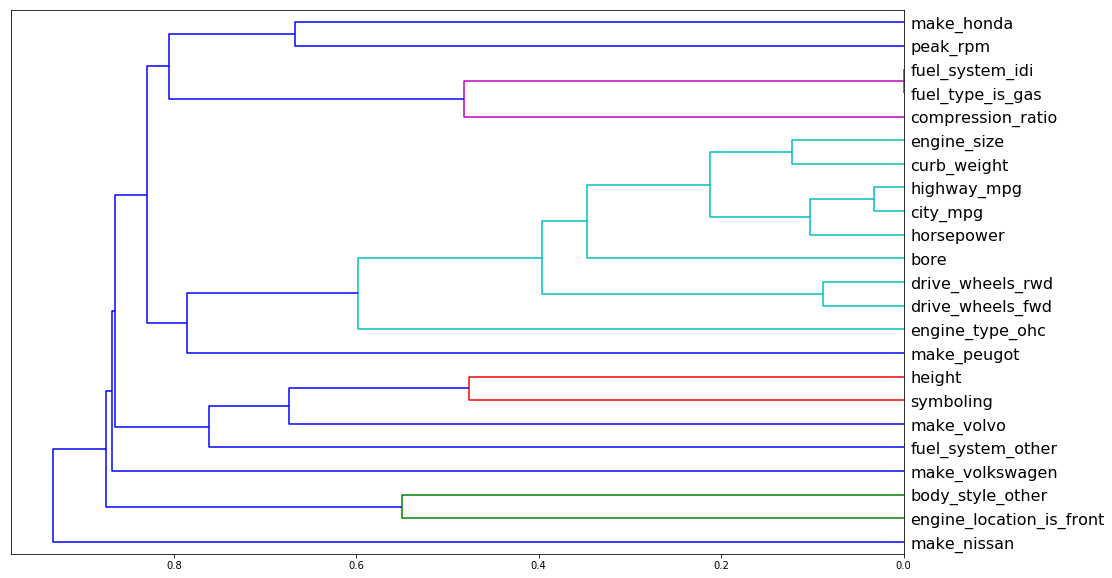

In [46]:
import scipy.cluster.hierarchy as hc
corr = reduced_X.corr(method = 'spearman')
corr_condensed = hc.distance.squareform(1 - np.abs(corr))
z = hc.linkage(corr_condensed, method = 'average')

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16, 10))
dendrogram = hc.dendrogram(z, labels = selected_feat_names, 
                           orientation = 'left', leaf_font_size=16 )

### By producing a dendrogram as above, I can see the spearman correlation better than the scatter matrix.

### I can eliminate either "fuel_system_idi" or "fuel_type_is_gas" as the correlation is -1. Also either "highway_mpg" or "city_mpg" can be eliminated, as the correlation between these two variables are  0.9677. 

### Before eliminate the correlated features, let's learn more about the domain to see if it can help decide which feature to eliminate.

In [47]:
reduced_X.columns

Index(['symboling', 'height', 'curb_weight', 'engine_size', 'bore',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'engine_location_is_front', 'fuel_type_is_gas',
       'make_honda', 'make_nissan', 'make_peugot', 'make_volkswagen',
       'make_volvo', 'body_style_other', 'drive_wheels_fwd',
       'drive_wheels_rwd', 'engine_type_ohc', 'fuel_system_idi',
       'fuel_system_other'],
      dtype='object')

1) symboling: -3, -2, -1, 0, 1, 2, 3.<br>
2) height: continuous from 47.8 to 59.8.<br> 
3) curb-weight: continuous from 1488 to 4066.<br>
4) engine-size: continuous from 61 to 326.<br> 
5) bore: continuous from 2.54 to 3.94.<br>
6) compression-ratio: continuous from 7 to 23.<br>
7) horsepower: continuous from 48 to 288.<br>
8) peak-rpm: continuous from 4150 to 6600.<br>
9) city-mpg: continuous from 13 to 49.<br>
10) highway-mpg: continuous from 16 to 54.<br>
11) engine-location: front, rear.<br>
12) fuel-type: diesel, gas.<br>
13) make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo<br>
14) body-style: hardtop, wagon, sedan, hatchback, convertible.<br>
15) drive-wheels: 4wd, fwd, rwd.<br>
16) engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.<br>
17) fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.<br> 
    
### By looking at the features above and looking at the scatter matrix, I decided to eliminate 'fuel_system_idi' and 'city_mpg' as these two are more correlated with other variables than 'fuel_type_is_gas' and 'highway_mpg', respectively.

In [48]:
pruned_X = reduced_X.drop(['fuel_system_idi', 'city_mpg'], axis=1)

In [49]:
pruned_X.columns

Index(['symboling', 'height', 'curb_weight', 'engine_size', 'bore',
       'compression_ratio', 'horsepower', 'peak_rpm', 'highway_mpg',
       'engine_location_is_front', 'fuel_type_is_gas', 'make_honda',
       'make_nissan', 'make_peugot', 'make_volkswagen', 'make_volvo',
       'body_style_other', 'drive_wheels_fwd', 'drive_wheels_rwd',
       'engine_type_ohc', 'fuel_system_other'],
      dtype='object')

In [50]:
pruned_X.head(2)

,symboling,height,curb_weight,engine_size,bore,compression_ratio,horsepower,peak_rpm,highway_mpg,engine_location_is_front,...,make_honda,make_nissan,make_peugot,make_volkswagen,make_volvo,body_style_other,drive_wheels_fwd,drive_wheels_rwd,engine_type_ohc,fuel_system_other
0,1.74347,-2.020417,-0.014566,0.074449,0.519089,-0.288349,0.171065,-0.263484,-0.546059,0.121867,...,-0.260208,-0.310253,-0.23812,-0.249351,-0.23812,3.693624,-1.188177,1.302831,-1.611363,-0.270737
1,1.74347,-2.020417,-0.014566,0.074449,0.519089,-0.288349,0.171065,-0.263484,-0.546059,0.121867,...,-0.260208,-0.310253,-0.23812,-0.249351,-0.23812,3.693624,-1.188177,1.302831,-1.611363,-0.270737


In [51]:
len(pruned_X.columns)

21

### let's see the accuracy score by using the pruned features.

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

pruned_X_train, pruned_X_test, y_train, y_test = train_test_split(pruned_X, scaled_y, test_size=0.2, random_state=42)

pruned_X_train, pruned_X_val, y_train, y_val = train_test_split(pruned_X_train, y_train, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(pruned_X_train, y_train)
model.coef_

array([ 0.43547727, -0.20557019, -0.10349567,  0.46819935, -0.11709273,
       -0.80084685, -0.3022446 ,  0.38447576, -0.09050541,  0.07469055,
       -0.81990147, -0.23078016,  0.13604241,  0.25502643, -0.09482945,
       -0.17682717, -0.28423826, -0.18667288,  0.41064767,  0.24811677,
       -0.25459872])

In [53]:
model.score(pruned_X_test, y_test)

0.19558691730999445

In [54]:
model.score(pruned_X_val, y_val)

0.2828401890482404

### When there were 23 features, the accuracy score was 0.1056(output 21) and now with 21 features, the score is 0.1956.<br> The best possible score is 1.0 and it can be negative because the model can be arbitrarily worse. The reason why I got small score was because there was discrepancy between RFECV and RFE when I was selecting the number of features. A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.<br>However, by dropping the two variables that are correlated with other varibles, I could improve my model, from score 0.1056 to score 0.1956.

### Feature importances

In [55]:
def feature_importances(df, estimator, df_cols = None):
    df_cols = df_cols or df.columns
    df_cols = df_cols.to_numpy()
    coefs = estimator.coef_
    abs_coefs = abs(coefs)
    paired = np.hstack((df_cols.reshape(-1, 1), coefs.reshape(-1, 1), abs_coefs.reshape(-1, 1)))
    ordered_cols = paired[paired[:, -1].argsort()][::-1]
    return ordered_cols

In [56]:
feature_importances(pruned_X, model)

array([['fuel_type_is_gas', -0.8199014654813637, 0.8199014654813637],
       ['compression_ratio', -0.8008468518964106, 0.8008468518964106],
       ['engine_size', 0.4681993472366467, 0.4681993472366467],
       ['symboling', 0.43547727467117686, 0.43547727467117686],
       ['drive_wheels_rwd', 0.4106476746581552, 0.4106476746581552],
       ['peak_rpm', 0.38447575973113585, 0.38447575973113585],
       ['horsepower', -0.3022445977393781, 0.3022445977393781],
       ['body_style_other', -0.28423826436032423, 0.28423826436032423],
       ['make_peugot', 0.25502643237316575, 0.25502643237316575],
       ['fuel_system_other', -0.25459872016071455, 0.25459872016071455],
       ['engine_type_ohc', 0.24811676996959942, 0.24811676996959942],
       ['make_honda', -0.23078016197772994, 0.23078016197772994],
       ['height', -0.20557018933945684, 0.20557018933945684],
       ['drive_wheels_fwd', -0.1866728849817157, 0.1866728849817157],
       ['make_volvo', -0.17682717209517082, 0.1768271720

### Based on the "feature_importances" shown above, 'fuel_type_is_gas' is the most important feature to predict the target variable('normalized_losses'), followed by 'compression_ratio', 'engine_size', 'symboling', drive_wheels_rwd', 'peak_rpm', and so on. The least important feature is 'engine_location_is_front'.

In [57]:
pruned_df = pruned_X.join(scaled_y)
pruned_df.head(10)

,symboling,height,curb_weight,engine_size,bore,compression_ratio,horsepower,peak_rpm,highway_mpg,engine_location_is_front,...,make_nissan,make_peugot,make_volkswagen,make_volvo,body_style_other,drive_wheels_fwd,drive_wheels_rwd,engine_type_ohc,fuel_system_other,normalized_losses
0,1.743470,-2.020417,-0.014566,0.074449,0.519089,-0.288349,0.171065,-0.263484,-0.546059,0.121867,...,-0.310253,-0.23812,-0.249351,-0.23812,3.693624,-1.188177,1.302831,-1.611363,-0.270737,0.000000
1,1.743470,-2.020417,-0.014566,0.074449,0.519089,-0.288349,0.171065,-0.263484,-0.546059,0.121867,...,-0.310253,-0.23812,-0.249351,-0.23812,3.693624,-1.188177,1.302831,-1.611363,-0.270737,0.000000
2,0.133509,-0.543527,0.514882,0.604046,-2.404862,-0.288349,1.261807,-0.263484,-0.691627,0.121867,...,-0.310253,-0.23812,-0.249351,-0.23812,-0.270737,-1.188177,1.302831,-1.611363,-0.270737,0.000000
3,0.938490,0.235942,-0.420797,-0.431076,-0.517248,-0.035973,-0.057230,0.787346,-0.109354,0.121867,...,-0.310253,-0.23812,-0.249351,-0.23812,-0.270737,0.841625,-0.767559,0.620593,-0.270737,1.328961
4,0.938490,0.235942,0.516807,0.218885,-0.517248,-0.540725,0.272529,0.787346,-1.273900,0.121867,...,-0.310253,-0.23812,-0.249351,-0.23812,-0.270737,-1.188177,-0.767559,0.620593,-0.270737,1.328961
5,0.938490,-0.256354,-0.093502,0.218885,-0.517248,-0.414537,0.145699,0.787346,-0.837195,0.121867,...,-0.310253,-0.23812,-0.249351,-0.23812,-0.270737,0.841625,-0.767559,0.620593,-0.270737,0.000000
6,0.133509,0.810288,0.555313,0.218885,-0.517248,-0.414537,0.145699,0.787346,-0.837195,0.121867,...,-0.310253,-0.23812,-0.249351,-0.23812,-0.270737,0.841625,-0.767559,0.620593,-0.270737,1.139109
7,0.133509,0.810288,0.767092,0.218885,-0.517248,-0.414537,0.145699,0.787346,-0.837195,0.121867,...,-0.310253,-0.23812,-0.249351,-0.23812,-0.270737,0.841625,-0.767559,0.620593,-0.270737,0.000000
8,0.133509,0.892338,1.021227,0.098522,-0.739320,-0.465012,0.906682,0.787346,-1.565037,0.121867,...,-0.310253,-0.23812,-0.249351,-0.23812,-0.270737,0.841625,-0.767559,0.620593,-0.270737,1.139109
9,-0.671472,-0.707626,0.957693,0.098522,-0.739320,-0.793101,1.414003,0.787346,-1.273900,0.121867,...,-0.310253,-0.23812,-0.249351,-0.23812,-0.270737,-1.188177,-0.767559,0.620593,-0.270737,0.000000


In [58]:
#exporting the dataframe with pruned features as csv file for later use.
pruned_df.to_csv(r'C:\Users\Minyeong\Desktop\pruned_scaled_features.csv')